In [33]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files

In [2]:
uploaded = files.upload()

Saving world_bank_dataset.csv to world_bank_dataset.csv


In [3]:
df = pd.read_csv(io.BytesIO(uploaded['world_bank_dataset.csv']))
df

,Country,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
0,Brazil,2010,1.493220e+12,8.290200e+08,66.7,3.81,10.79,76.76
1,Japan,2011,1.756270e+13,8.970100e+08,61.4,17.98,15.67,67.86
2,India,2012,1.642688e+13,6.698500e+08,69.1,16.02,2.08,81.08
3,Mexico,2013,1.189001e+13,1.138000e+08,80.1,6.26,19.13,53.46
4,India,2014,2.673020e+12,2.971000e+07,62.7,3.10,15.66,82.17
...,...,...,...,...,...,...,...,...
195,India,2015,1.110880e+12,6.727800e+08,78.5,22.30,11.36,66.04
196,Australia,2016,9.210290e+12,6.896500e+08,64.9,9.82,15.59,67.29
197,United States,2017,4.937150e+12,1.234820e+09,61.0,4.14,14.66,91.16
198,Canada,2018,1.088696e+13,2.625900e+08,76.5,2.28,7.25,59.21


In [4]:
print("Prvih nekoliko redova podataka:")
print(df.head())
print("\nInformacije o podacima:")
df.info()
print("\nStatistički podaci:")
print(df.describe())

Prvih nekoliko redova podataka:
  Country  Year     GDP (USD)   Population  Life Expectancy  \
0  Brazil  2010  1.493220e+12  829020000.0             66.7   
1   Japan  2011  1.756270e+13  897010000.0             61.4   
2   India  2012  1.642688e+13  669850000.0             69.1   
3  Mexico  2013  1.189001e+13  113800000.0             80.1   
4   India  2014  2.673020e+12   29710000.0             62.7   

   Unemployment Rate (%)  CO2 Emissions (metric tons per capita)  \
0                   3.81                                   10.79   
1                  17.98                                   15.67   
2                  16.02                                    2.08   
3                   6.26                                   19.13   
4                   3.10                                   15.66   

   Access to Electricity (%)  
0                      76.76  
1                      67.86  
2                      81.08  
3                      53.46  
4                      82

In [5]:
# Provera nedostajućih vrednosti
print("\nBroj nedostajućih vrednosti po kolonama:")
print(df.isnull().sum())


Broj nedostajućih vrednosti po kolonama:
Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64


In [6]:
df.fillna(df.median(numeric_only=True), inplace=True)

In [7]:
for col in df.select_dtypes(include=['object']).columns:
    mode_value = df[col].mode()[0]
    df[col] = df[col].fillna(mode_value)

In [8]:
print("\nBroj nedostajućih vrednosti nakon popunjavanja:")
print(df.isnull().sum())


Broj nedostajućih vrednosti nakon popunjavanja:
Country                                   0
Year                                      0
GDP (USD)                                 0
Population                                0
Life Expectancy                           0
Unemployment Rate (%)                     0
CO2 Emissions (metric tons per capita)    0
Access to Electricity (%)                 0
dtype: int64


## **FAZA 5**

In [9]:
X = df[['GDP (USD)', 'Population', 'Unemployment Rate (%)',
          'CO2 Emissions (metric tons per capita)', 'Access to Electricity (%)']]

y = (df['Life Expectancy'] > df['Life Expectancy'].median()).astype(int)

In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [12]:
# Cross-validation za logističku regresiju
model = LogisticRegression(max_iter=200, class_weight='balanced')
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
print(f"Prosečna tačnost sa K-Fold Cross-Validation: {scores.mean():.2f}")

Prosečna tačnost sa K-Fold Cross-Validation: 0.52


In [13]:
classification_models = {
    "Logistička regresija": LogisticRegression(max_iter=200, class_weight='balanced'),
    "SVM (linearna jezgra)": SVC(kernel='linear', probability=True, class_weight='balanced'),
    "SVM (RBF jezgra)": SVC(kernel='rbf', probability=True, class_weight='balanced'),
    "SVM (polinomska jezgra)": SVC(kernel='poly', probability=True, class_weight='balanced')
}

In [14]:
classification_results = {}
for name, model in classification_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    classification_results[name] = {
        "Tačnost": accuracy_score(y_test, y_pred),
        "Preciznost": precision_score(y_test, y_pred, average='weighted'),
        "Odziv": recall_score(y_test, y_pred, average='weighted'),
        "F1-Score": f1_score(y_test, y_pred, average='weighted')
    }

In [16]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred_continuous = linear_regression.predict(X_test)
mse_linear = mean_squared_error(y_test, y_pred_continuous)
print("\nLinearna regresija (MSE):", mse_linear)


Linearna regresija (MSE): 0.2647789269547987


In [17]:
classification_results_df = pd.DataFrame(classification_results).T
print("\nRezultati klasifikacionih modela:")
print(classification_results_df)


Rezultati klasifikacionih modela:
                          Tačnost  Preciznost     Odziv  F1-Score
Logistička regresija     0.516667    0.516685  0.516667  0.516532
SVM (linearna jezgra)    0.550000    0.550056  0.550000  0.549875
SVM (RBF jezgra)         0.500000    0.500000  0.500000  0.485714
SVM (polinomska jezgra)  0.483333    0.482374  0.483333  0.476204


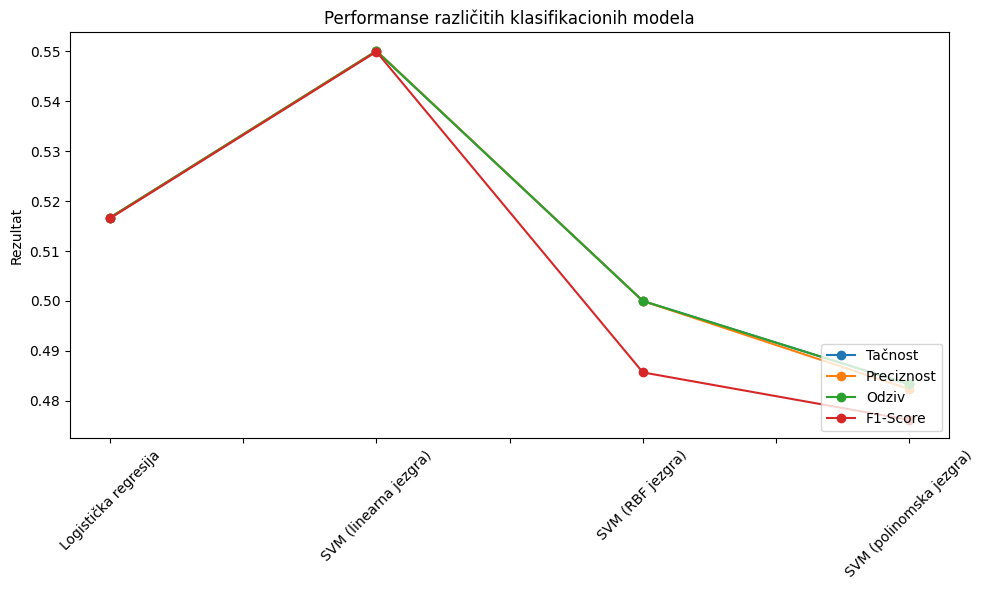

In [18]:
classification_results_df.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Performanse različitih klasifikacionih modela')
plt.ylabel('Rezultat')
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

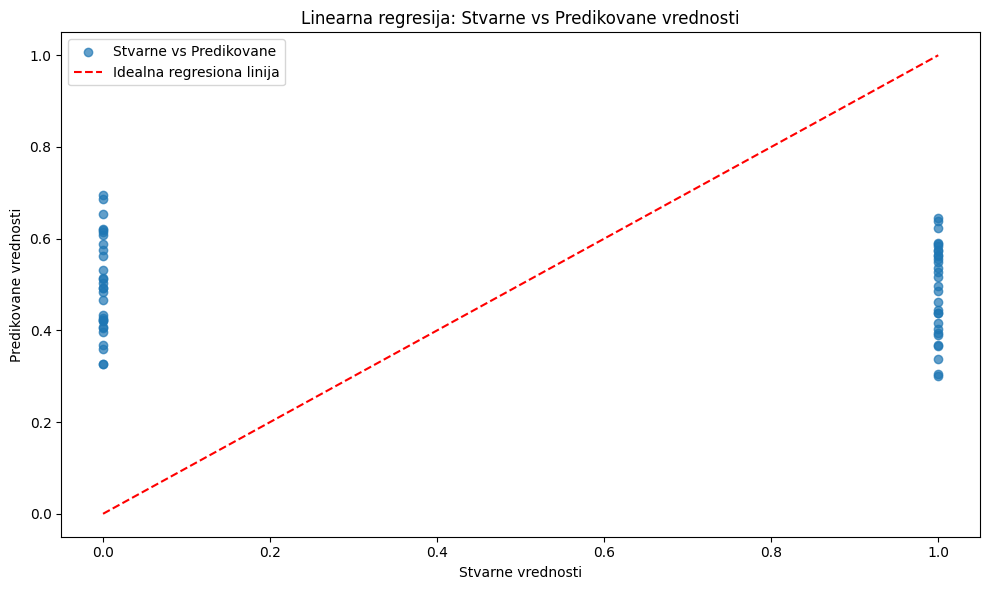

In [19]:
# Vizualizacija linearne regresije
plt.figure(figsize=(10, 6))

plt.scatter(y_test, y_pred_continuous, alpha=0.7, label='Stvarne vs Predikovane')

x_vals = np.linspace(min(y_test), max(y_test), 100)
y_vals = x_vals
plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Idealna regresiona linija')

plt.title('Linearna regresija: Stvarne vs Predikovane vrednosti')
plt.xlabel('Stvarne vrednosti')
plt.ylabel('Predikovane vrednosti')
plt.legend()
plt.tight_layout()
plt.show()

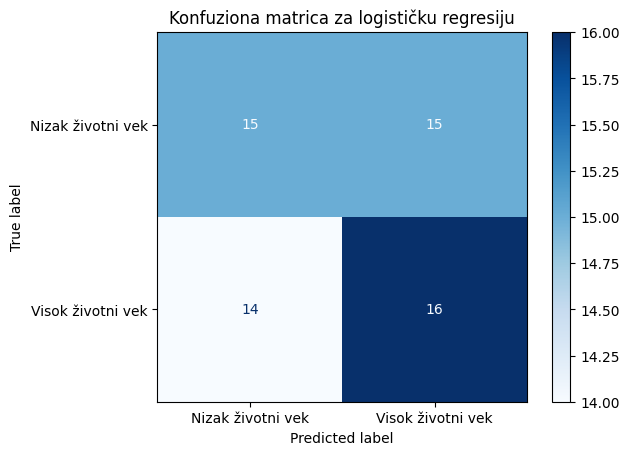

In [20]:
# Konfuziona matrica za logističku regresiju
log_reg_predictions = classification_models["Logistička regresija"].predict(X_test)
log_reg_conf_matrix = confusion_matrix(y_test, log_reg_predictions)
log_reg_disp = ConfusionMatrixDisplay(confusion_matrix=log_reg_conf_matrix, display_labels=["Nizak životni vek", "Visok životni vek"])
log_reg_disp.plot(cmap='Blues')
plt.title('Konfuziona matrica za logističku regresiju')
plt.show()

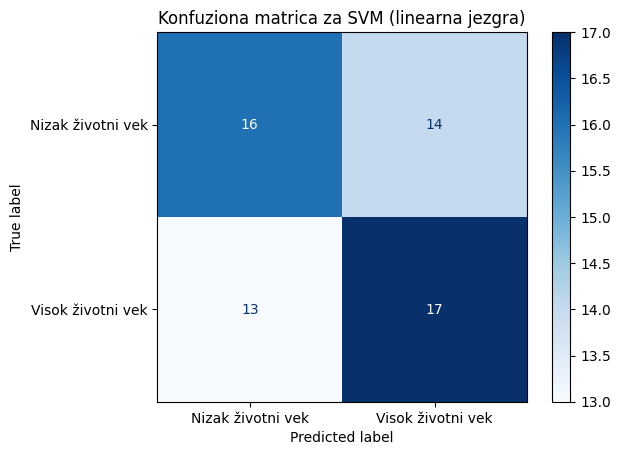

In [21]:
# Konfuziona matrica za SVM (linearna jezgra)
svm_linear_predictions = classification_models["SVM (linearna jezgra)"].predict(X_test)
svm_linear_conf_matrix = confusion_matrix(y_test, svm_linear_predictions)
svm_linear_disp = ConfusionMatrixDisplay(confusion_matrix=svm_linear_conf_matrix, display_labels=["Nizak životni vek", "Visok životni vek"])
svm_linear_disp.plot(cmap='Blues')
plt.title('Konfuziona matrica za SVM (linearna jezgra)')
plt.show()

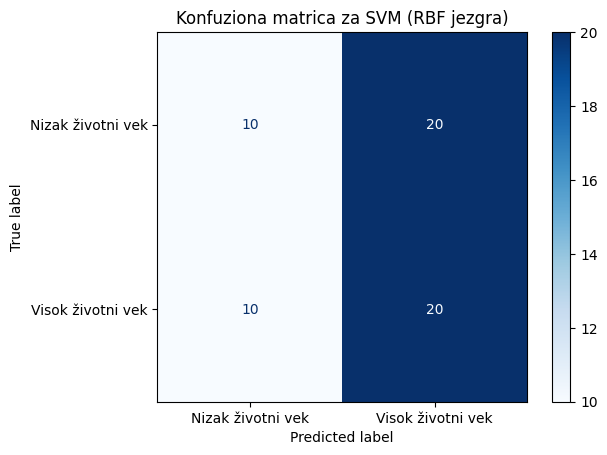

In [22]:
# Konfuziona matrica za SVM (RBF jezgra)
svm_rbf_predictions = classification_models["SVM (RBF jezgra)"].predict(X_test)
svm_rbf_conf_matrix = confusion_matrix(y_test, svm_rbf_predictions)
svm_rbf_disp = ConfusionMatrixDisplay(confusion_matrix=svm_rbf_conf_matrix, display_labels=["Nizak životni vek", "Visok životni vek"])
svm_rbf_disp.plot(cmap='Blues')
plt.title('Konfuziona matrica za SVM (RBF jezgra)')
plt.show()

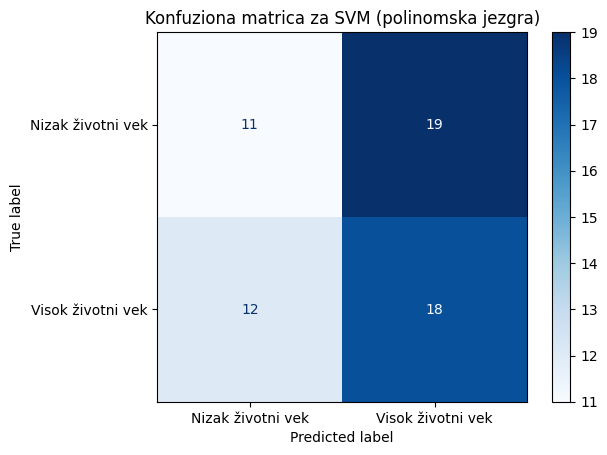

In [23]:
# Konfuziona matrica za SVM (polinomska jezgra)
svm_poly_predictions = classification_models["SVM (polinomska jezgra)"].predict(X_test)
svm_poly_conf_matrix = confusion_matrix(y_test, svm_poly_predictions)
svm_poly_disp = ConfusionMatrixDisplay(confusion_matrix=svm_poly_conf_matrix, display_labels=["Nizak životni vek", "Visok životni vek"])
svm_poly_disp.plot(cmap='Blues')
plt.title('Konfuziona matrica za SVM (polinomska jezgra)')
plt.show()

## **FAZA 6**

In [24]:
features = [
    'GDP (USD)', 'Population', 'Life Expectancy', 'Unemployment Rate (%)',
    'CO2 Emissions (metric tons per capita)', 'Access to Electricity (%)'
]
X = df[features]
X = X.dropna()

In [25]:
median_life_expectancy = X['Life Expectancy'].median()
y = (X['Life Expectancy'] > median_life_expectancy).astype(int)  # 1 = visok, 0 = nizak

In [26]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [28]:
# K-Means klasterovanje
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_pca)
kmeans_labels = kmeans.labels_

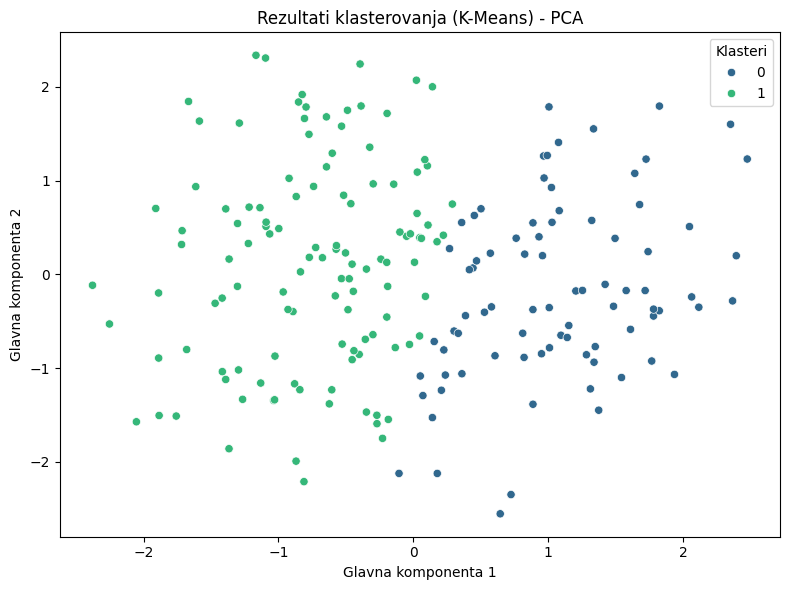

In [29]:
#Vizuelizacija K-Means
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette='viridis', legend='full')
plt.title('Rezultati klasterovanja (K-Means) - PCA')
plt.xlabel('Glavna komponenta 1')
plt.ylabel('Glavna komponenta 2')
plt.legend(title='Klasteri', loc='best')
plt.tight_layout()
plt.show()

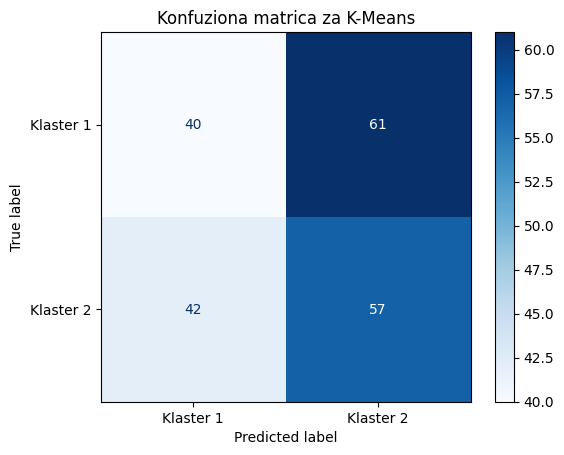

In [30]:
# Konfuziona matrica za K-Means
kmeans_conf_matrix = confusion_matrix(y, kmeans_labels)
kmeans_disp = ConfusionMatrixDisplay(confusion_matrix=kmeans_conf_matrix, display_labels=["Klaster 1", "Klaster 2"])
kmeans_disp.plot(cmap='Blues')
plt.title('Konfuziona matrica za K-Means')
plt.show()

In [31]:
# Stablo odlučivanja
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
tree_predictions = tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_predictions)

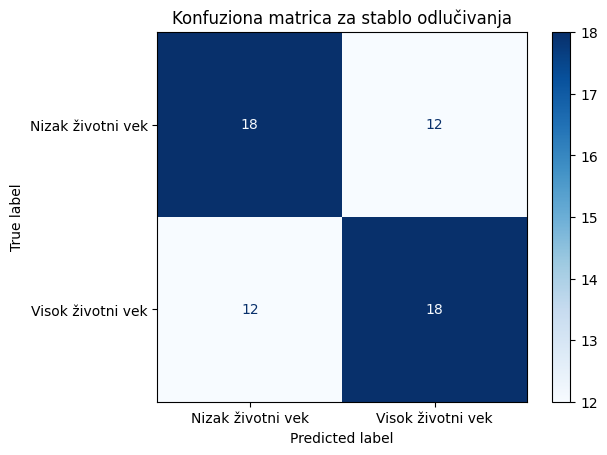

Metričke vrednosti za stablo odlučivanja:
Tačnost (Accuracy): 0.6
Preciznost (Precision): 0.6
Odziv (Recall): 0.6
F1-Score: 0.6


In [32]:
tree_conf_matrix = confusion_matrix(y_test, tree_predictions)
tree_disp = ConfusionMatrixDisplay(confusion_matrix=tree_conf_matrix, display_labels=["Nizak životni vek", "Visok životni vek"])
tree_disp.plot(cmap='Blues')
plt.title('Konfuziona matrica za stablo odlučivanja')
plt.show()

tree_precision = precision_score(y_test, tree_predictions)
tree_recall = recall_score(y_test, tree_predictions)
tree_f1 = f1_score(y_test, tree_predictions)

print(f"Metričke vrednosti za stablo odlučivanja:")
print(f"Tačnost (Accuracy): {tree_accuracy}")
print(f"Preciznost (Precision): {tree_precision}")
print(f"Odziv (Recall): {tree_recall}")
print(f"F1-Score: {tree_f1}")

In [ ]:
# Neuronska mreža
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - accuracy: 0.4926 - loss: 0.7048 - val_accuracy: 0.5357 - val_loss: 0.6915
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5317 - loss: 0.7009 - val_accuracy: 0.5714 - val_loss: 0.6909
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5503 - loss: 0.6908 - val_accuracy: 0.5714 - val_loss: 0.6912
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6089 - loss: 0.6763 - val_accuracy: 0.5357 - val_loss: 0.6917
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6427 - loss: 0.6691 - val_accuracy: 0.5714 - val_loss: 0.6934
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5775 - loss: 0.6650 - val_accuracy: 0.5357 - val_loss: 0.6948
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5448 - loss: 0.6709 - val_accuracy: 0.4643 - val_loss: 0.6967
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5452 - loss: 0.6662 - val_accuracy: 0.4643 - val_loss:

In [ ]:
y_pred_nn = (model.predict(X_test) > 0.5).astype(int)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Tačnost neuronske mreže: {nn_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Tačnost neuronske mreže (Keras): 0.55


In [ ]:
print("\nIzveštaj za stablo odlučivanja:\n", classification_report(y_test, tree_predictions, target_names=['Nizak životni vek', 'Visok životni vek']))
print("\nIzveštaj za neuronsku mrežu:\n", classification_report(y_test, y_pred_nn, target_names=['Nizak životni vek', 'Visok životni vek']))


Izveštaj za stablo odlučivanja:
                    precision    recall  f1-score   support

Nizak životni vek       0.60      0.60      0.60        30
Visok životni vek       0.60      0.60      0.60        30

         accuracy                           0.60        60
        macro avg       0.60      0.60      0.60        60
     weighted avg       0.60      0.60      0.60        60


Izveštaj za neuronsku mrežu:
                    precision    recall  f1-score   support

Nizak životni vek       0.56      0.47      0.51        30
Visok životni vek       0.54      0.63      0.58        30

         accuracy                           0.55        60
        macro avg       0.55      0.55      0.55        60
     weighted avg       0.55      0.55      0.55        60



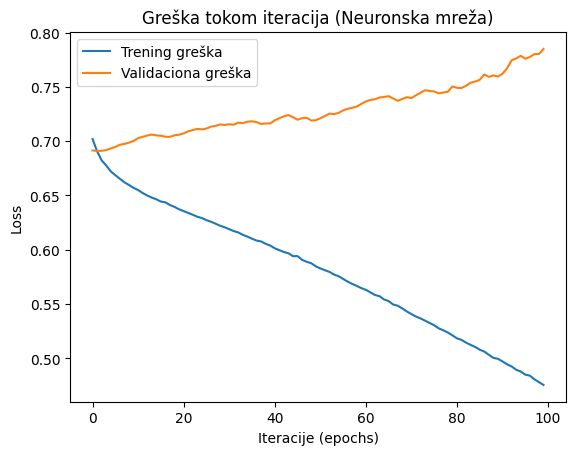

In [ ]:
# Vizualizacija performansi neuronske mreže
plt.plot(history.history['loss'], label='Trening greška')
plt.plot(history.history['val_loss'], label='Validaciona greška')
plt.title('Greška tokom iteracija (Neuronska mreža)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Definicija poboljšanog modela
model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=1, callbacks=[early_stopping])

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 75ms/step - accuracy: 0.4686 - loss: 2.0602 - val_accuracy: 0.5000 - val_loss: 2.0365
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5235 - loss: 2.0319 - val_accuracy: 0.5000 - val_loss: 2.0077
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4906 - loss: 2.0112 - val_accuracy: 0.5000 - val_loss: 1.9801
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5232 - loss: 1.9795 - val_accuracy: 0.4643 - val_loss: 1.9532
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4961 - loss: 1.9525 - val_accuracy: 0.5000 - val_loss: 1.9268
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5635 - loss: 1.9098 - val_accuracy: 0.5357 - val_loss: 1.9008
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5626 - loss: 1.8835 - val_accuracy: 0.5357 - val_loss: 1.8753
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5344 - loss: 1.8676 - val_accuracy: 0.4643 - val_loss:

In [ ]:
y_pred_nn = (model.predict(X_test, batch_size=32) > 0.5).astype(int)
nn_accuracy = accuracy_score(y_test, y_pred_nn)
print(f"Tačnost neuronske mreže : {nn_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Tačnost neuronske mreže : 0.55


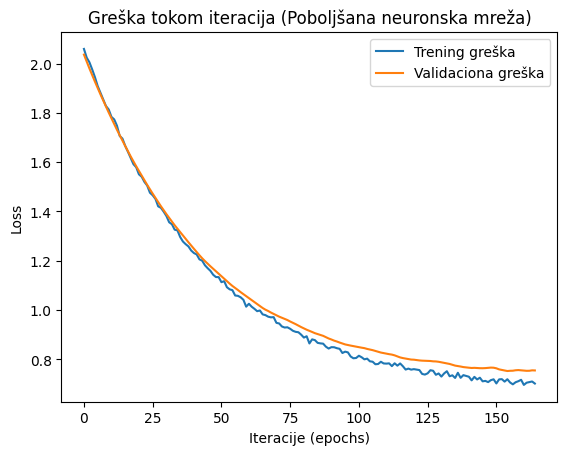

In [ ]:
# Vizualizacija performansi poboljšane neuronske mreže
plt.plot(history.history['loss'], label='Trening greška')
plt.plot(history.history['val_loss'], label='Validaciona greška')
plt.title('Greška tokom iteracija (Poboljšana neuronska mreža)')
plt.xlabel('Epohs')
plt.ylabel('Loss')
plt.legend()
plt.show()

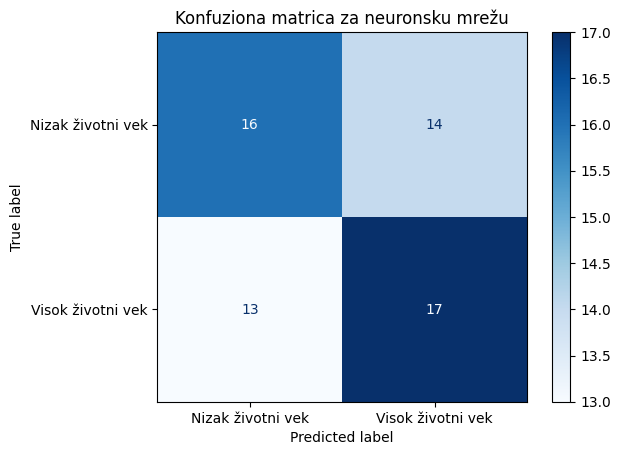

In [ ]:
nn_conf_matrix = confusion_matrix(y_test, y_pred_nn)
nn_disp = ConfusionMatrixDisplay(confusion_matrix=nn_conf_matrix, display_labels=["Nizak životni vek", "Visok životni vek"])
nn_disp.plot(cmap='Blues')
plt.title('Konfuziona matrica za neuronsku mrežu')
plt.show()